# Windows or Mac

DATA 5303 | Introduction to Machine Learning
Chase Kusterer

**Team 15**
- Nimisha Patel
- Pimkarn Mekpruksawong
- Pedro Guarda Chinen
- Ji Sung Jung 
- Olusola Scott-Ogunkoya

## Introduction

**Do personality types affect behavior in consumer purchases?**

We garnered ~140 responses with questions from the perspective of the Big Five Personality Traits and the Hult DNA.

The **Big Five** Personality Traits is a common survey that allows us to associate certain behaviors to the following categories:

*   **Extroversion** is the personality trait of seeking fulfillment from sources outside the self or in community.
*   **Agreeableness** reflects how much individuals adjust their behavior to suit others.
*   **Conscientiousness** is the personality trait of being honest and hardworking.
*   **Neurotic** is the personality trait of being emotional.
*   **Openness** is the personality trait of seeking new experiences and intellectual pursuits.
---

**Hult DNA** is comprised of 3 competencies:
* **Thinking Big**
 * Shows self awareness, embraces change, and demonstrates dynamic thinking
* **Communicating**
 * Speak and listen carefully, influences confidently, and present ideas effectively
* **Team Building**
 * Foster collaborative relationships, inspire productivity, and resolve conflict constructively
 
**Objective**

Analyze the current demographic and behaviors to find Apple's current customers and next steps for future campaigns based on their personality traits.

# Code
## Set-Up

In [1]:
########################################
# importing packages
########################################
import numpy as np                                      # mathematical essentials
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# loading data
survey_data = pd.read_excel('survey_data.xlsx')
survey_df = survey_data.drop('surveyID', axis = 1)

### Helper Functions

In [2]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

### Cleaning up Data

In [3]:
# subset the demographics of survey users
dem_columns = ['What program are you in?', 'What is your age?', 'Gender', 
               'What is your nationality? ', 'What is your ethnicity?']
dem_data = survey_data.loc[ : , dem_columns]
survey_df = survey_df.drop(dem_columns, axis = 1)

# cleaning the nationalities to avoid repeated values in different formats
dem_data['What is your nationality? '] = dem_data['What is your nationality? '].str.lower().str.title()

#############################################
# clean the demographics - ethnicities column
#############################################
indian = ['Indian', 'Indian.']
china = ['China', 'Chinese']
german = ['German', 'Germany']
peruvian = ['Peruvian', 'Peru']
colombian = ['Colombian', 'Colombia']
korean = ['Republic of Korea', 'South Korea', 'Korea']
american = ['Usa', 'American']
brazilian = ['Brazilian', 'Brazil']
nigeria = ['Nigerian', 'Nigeria']
russian = ['Russian', 'Russia']
spanish = ['Spain', 'Spanish']
indonesian = ['Indonesia', 'Indonesian']
congo = ['Congolease', 'Congolese (Dr Congo)']
filipino = ['Philippines', 'Filipino', 'Filipino ']
ecuador = ['Ecuador', 'Ecuadorian']
canada = ['Canada', 'Canadian']
czech = ['Czech', 'Czech Republic']

nationalities = []

for nat in dem_data['What is your nationality? ']:
    if nat in indian:
        nationalities.append('Indian')
    elif nat in china:
        nationalities.append('Chinese')
    elif nat in german:
        nationalities.append('German')
    elif nat in peruvian:
        nationalities.append('Peruvian')
    elif nat in colombian:
        nationalities.append('Colombian')
    elif nat in korean:
        nationalities.append('Korean')
    elif nat in american:
        nationalities.append('American')
    elif nat in brazilian:
        nationalities.append('Brazilian')
    elif nat in nigeria:
        nationalities.append('Nigerian')
    elif nat in russian:
        nationalities.append('Russian')
    elif nat in spanish:
        nationalities.append('Spanish')
    elif nat in indonesian:
        nationalities.append('Indonesian')
    elif nat in congo:
        nationalities.append('Congolese')
    elif nat in filipino:
        nationalities.append('Filipino')
    elif nat in ecuador:
        nationalities.append('Ecuador')
    elif nat in canada:
        nationalities.append('Canada')
    elif nat in czech:
        nationalities.append('Czech')
    else:
        nationalities.append(nat)

dem_data['What is your nationality? '] = nationalities

In [4]:
# laptop buying habits
laptop_columns = ['What laptop do you currently have?',
                  'What laptop would you buy in next assuming if all laptops cost the same?']
laptop_data = survey_data.loc[ : , laptop_columns]
survey_df = survey_df.drop(laptop_columns, axis = 1)

In [5]:
# remove replicated columns
rep_col = ['Respond effectively to multiple priorities.1',
           'Take initiative even when circumstances, objectives, or rules aren\'t clear.1',
           'Encourage direct and open discussions.1']
survey_df = survey_df.drop(rep_col, axis = 1)

In [6]:
#######################################################
# calculate the score of the big personality traits
#######################################################

def calc_extrovert(data):
    data.iloc[ : , 1] = -1 * data.iloc[ : , 1]
    data.iloc[ : , 3] = -1 * data.iloc[ : , 3]
    data.iloc[ : , 5] = -1 * data.iloc[ : , 5]
    data.iloc[ : , 7] = -1 * data.iloc[ : , 7]
    data.iloc[ : , 9] = -1 * data.iloc[ : , 9]
    
    scores = data.sum(axis = 1)
    return 20 + scores

def calc_agreeable(data):
    data.iloc[ : , 0] = -1 * data.iloc[ : , 0]
    data.iloc[ : , 2] = -1 * data.iloc[ : , 2]
    data.iloc[ : , 4] = -1 * data.iloc[ : , 4]
    data.iloc[ : , 6] = -1 * data.iloc[ : , 6]
    
    scores = data.sum(axis = 1)
    return 14 + scores

def calc_conscientious(data):
    data.iloc[ : , 1] = -1 * data.iloc[ : , 1]
    data.iloc[ : , 3] = -1 * data.iloc[ : , 3]
    data.iloc[ : , 5] = -1 * data.iloc[ : , 5]
    data.iloc[ : , 7] = -1 * data.iloc[ : , 7]
    
    scores = data.sum(axis = 1)
    return 14 + scores

def calc_neurotic(data):
    data.iloc[ : , 0] = -1 * data.iloc[ : , 0]
    data.iloc[ : , 2] = -1 * data.iloc[ : , 2]
    data.iloc[ : , 4] = -1 * data.iloc[ : , 4]
    data.iloc[ : , 5] = -1 * data.iloc[ : , 5]
    data.iloc[ : , 6] = -1 * data.iloc[ : , 6]
    data.iloc[ : , 7] = -1 * data.iloc[ : , 7]
    data.iloc[ : , 8] = -1 * data.iloc[ : , 8]
    data.iloc[ : , 9] = -1 * data.iloc[ : , 9]

    scores = data.sum(axis = 1)
    return 38 + scores

def calc_open(data):
    data.iloc[ : , 1] = -1 * data.iloc[ : , 9]
    data.iloc[ : , 3] = -1 * data.iloc[ : , 9]
    data.iloc[ : , 6] = -1 * data.iloc[ : , 9]

    scores = data.sum(axis = 1)
    return 8 + scores

In [7]:
big_five_columns = ['Extrovert', 'Agreeable', 'Conscientious', 'Neurotic', 'Open']

# indexes of the questions in survey_df relation to big five
extrovert_idx = [0, 10, 5, 15, 20, 25, 30, 35, 40, 45]
agreeable_idx = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
conscientious_idx = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]
neurotic_idx = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]
open_idx = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]

# subset the questions into dataframes
extrovert_df = survey_df.iloc[ : , extrovert_idx]
agreeable_df = survey_df.iloc[ : , agreeable_idx]
conscientious_df = survey_df.iloc[ : , conscientious_idx]
neurotic_df = survey_df.iloc[ : , neurotic_idx]
open_df = survey_df.iloc[ : , open_idx]

# calculate the rows of each score
extrovert_score = calc_extrovert(extrovert_df.copy())
agreeable_score = calc_agreeable(agreeable_df.copy())
conscientious_score = calc_conscientious(conscientious_df.copy())
neurotic_score = calc_neurotic(neurotic_df.copy())
open_score = calc_open(open_df.copy())

# concat the scores into a new data frame
big_five_data = pd.concat([extrovert_score, agreeable_score, 
                           conscientious_score, neurotic_score,
                           open_score], axis = 1)
big_five_data.columns = big_five_columns

In [8]:
hult_dna_col = ['Thinking', 'Communicating', 'Team-Building']

# indexes of the questions in survey_df relation to hult
survey_hult_dna = survey_df.iloc[ : , 50: ]
think_idx = [0, 1, 2, 3, 4, 5]
communicate_idx = [6, 7, 8, 11, 13]
team_idx = [9, 10, 12, 14, 15, 16, 17]

# subset the questions into dataframes
think_df = survey_hult_dna.iloc[ : , think_idx]
communicate_df = survey_hult_dna.iloc[ : , communicate_idx]
team_df = survey_hult_dna.iloc[ : , team_idx]

# calculate the rows of each score
think_df.iloc[ : , 1] = -1 * think_df.iloc[ : , 1]
communicate_df.iloc[ : , 2] = -1 * communicate_df.iloc[ : , 2]
team_df.iloc[ : , 2] = -1 * team_df.iloc[ : , 2]

think_score = 5 + think_df.sum(axis = 1)
communicate_score = 10 + communicate_df.sum(axis = 1)
team_score = team_df.sum(axis = 1)

# concat the scores into a new data frame
hult_dna_data = pd.concat([think_score, communicate_score, 
                           team_score], axis = 1)

hult_dna_data.columns = hult_dna_col

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Scaling the Survey

In [9]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(big_five_data)

# TRANSFORMING our data after fit
x_scaled_big_five = scaler.transform(big_five_data)

# converting scaled data into a DataFrame
big_five_scaled = pd.DataFrame(x_scaled_big_five)

# reattaching column names
big_five_scaled.columns = big_five_data.columns

In [10]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(hult_dna_data)

# TRANSFORMING our data after fit
x_scaled_hult = scaler.transform(hult_dna_data)

# converting scaled data into a DataFrame
hult_scaled = pd.DataFrame(x_scaled_hult)

# reattaching column names
hult_scaled.columns = hult_dna_data.columns

## PCA Analysis

### Big Five

In [11]:
# INSTANTIATING a PCA object with no limit to principal components
pca1 = PCA(n_components = 3,
           random_state = 219)

# FITTING and TRANSFORMING the scaled data
big_five_pca = pca1.fit_transform(big_five_scaled)

## COMMENT out screeplot display
# see from None -> 3
# scree_plot(pca_object = pca1)

In [12]:
# transposing pca components
big_five_factor_load = pd.DataFrame(np.transpose(pca1.components_))

# naming rows as original features
big_five_factor_load = big_five_factor_load.set_index(big_five_scaled.columns)

big_five_factor_load

0         1         2
Extrovert     -0.093240  0.712502 -0.578286
Agreeable     -0.593184  0.245965  0.060705
Conscientious -0.618922 -0.128190 -0.181746
Neurotic      -0.379619 -0.586408 -0.303238
Open          -0.335058  0.267460  0.732745

**Results from the Behaviors Each Type Represent**

---

**Type 0 - Cautiously Opinionated**

* Challenging/Detached, Easy-Going/Careless
 
**Type 1 - Friendly**

* Outgoing/Energetic, Sensitive/Nervous

**Type 2 - Curious Introvert**

* Curious/Inventive, Solidarity/Reserved

### Hult

In [13]:
# INSTANTIATING a PCA object with no limit to principal components
pca2 = PCA(n_components = None,
           random_state = 219)

# FITTING and TRANSFORMING the scaled data
hult_pca = pca2.fit_transform(hult_scaled)

## COMMENT out screeplot display
# see from None, that we need only 3 components
# scree_plot(pca_object = pca2)

In [14]:
# transposing pca components
hult_factor_load = pd.DataFrame(np.transpose(pca2.components_))

# naming rows as original features
hult_factor_load = hult_factor_load.set_index(hult_scaled.columns)

hult_factor_load

0         1         2
Thinking      -0.565094 -0.800267 -0.200604
Communicating -0.588484  0.220565  0.777841
Team-Building -0.578234  0.557606 -0.595584

**Results from the Behaviors Each Type Represent**

---

**Type 0 - Opinionated** 

* Fixed Mindset
* Their Opinion Matters
* Works Alone

**Type 1 - Team Leader**

* Fixed Mindset
* Team Player, Average Communicator

**Type 2 - Debater** 

* Communicates ideas
* Not a team player

## Clustering

In [15]:
big_five_pca_col = ['Cautiously Opinionated',
                    'Friendly',
                    'Curious Introvert']

# analyzing factor strengths per customer
big_five_pca = pca1.transform(big_five_scaled)

# converting to a DataFrame
big_five_pca_df = pd.DataFrame(big_five_pca)

# renaming columns
big_five_pca_df.columns = big_five_pca_col

In [16]:
hult_pca_col = ['Opinionated',
                'Team Leader',
                'Debater']

# analyzing factor strengths per customer
hult_pca = pca2.transform(hult_scaled)

# converting to a DataFrame
hult_pca_df = pd.DataFrame(hult_pca)

# renaming columns
hult_pca_df.columns = hult_pca_col

In [17]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(big_five_pca_df)

# TRANSFORMING our data after fit
big_five_scaled_pca = scaler.transform(big_five_pca_df)

# converting scaled data into a DataFrame
big_five_pca_scaled = pd.DataFrame(big_five_scaled_pca)

# reattaching column names
big_five_pca_scaled.columns = big_five_pca_col

In [18]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(hult_pca_df)

# TRANSFORMING our data after fit
hult_scaled_pca = scaler.transform(hult_pca_df)

# converting scaled data into a DataFrame
hult_pca_scaled = pd.DataFrame(hult_scaled_pca)

# reattaching column names
hult_pca_scaled.columns = hult_pca_col

### Big Five

In [19]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = big_five_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

In [20]:
## COMMENT out screeplot display
# see that 
# calling the inertia_plot() function
# interia_plot(data = big_five_pca_scaled)

In [50]:
# INSTANTIATING a k-Means object with clusters
big_five_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)

# fitting the object to the data
big_five_k_pca.fit(big_five_pca_scaled)

# converting the clusters to a DataFrame
big_five_kmeans_pca = pd.DataFrame({'Cluster': big_five_k_pca.labels_})

# checking the results
print(big_five_kmeans_pca.iloc[: , 0].value_counts())

# storing cluster centers
big_five_centroids_pca = big_five_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
big_five_centroids_pca_df = pd.DataFrame(big_five_centroids_pca)

# renaming principal components
big_five_centroids_pca_df.columns = big_five_pca_col

# checking results (clusters = rows, pc = columns)
big_five_centroids_pca_df.round(2)

2    48
1    35
0    29
3    25
Name: Cluster, dtype: int64


Cautiously Opinionated  Friendly  Curious Introvert
0                   -0.45     -0.95               0.93
1                    0.90     -0.58              -0.64
2                   -0.80      0.50              -0.45
3                    0.79      0.96               0.68

* **Cluster 0** contains more curious introverts
* **Cluster 1** contains more cautiously opinionated individuals
* **Cluster 2** contains more friendly individuals
* **Cluster 3** contains a combination of all three, which exemplifies team leaders that think carefully to themselves and can help lead.

### Hult

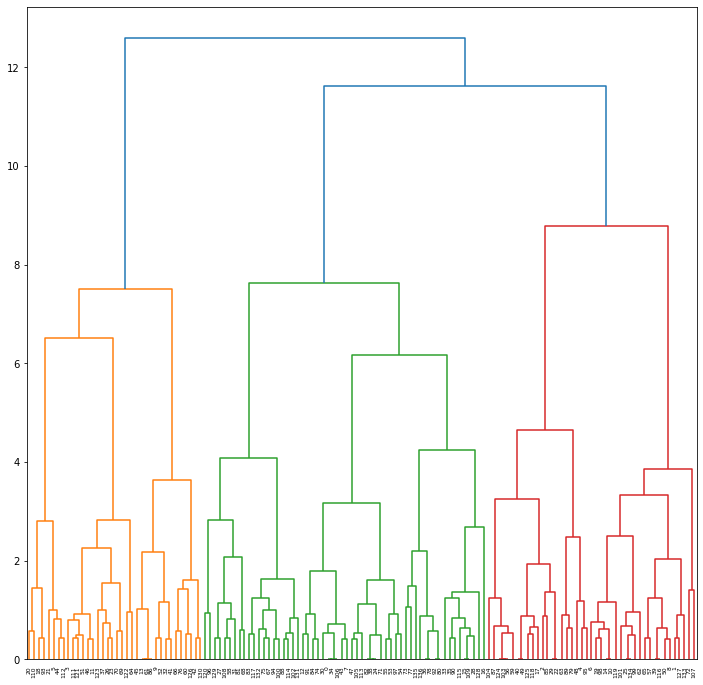

In [22]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = hult_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

In [23]:
# calling the inertia_plot() function
# interia_plot(data = hult_pca_scaled)

In [49]:
# INSTANTIATING a k-Means object with clusters
hult_k_pca = KMeans(n_clusters   = 5,
                    random_state = 219)

# fitting the object to the data
hult_k_pca.fit(hult_pca_scaled)

# converting the clusters to a DataFrame
hult_kmeans_pca = pd.DataFrame({'Cluster': hult_k_pca.labels_})

# # checking the results
# print(hult_kmeans_pca.iloc[: , 0].value_counts())

# storing cluster centers
hult_centroids_pca = hult_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
hult_centroids_pca_df = pd.DataFrame(hult_centroids_pca)

# renaming principal components
hult_centroids_pca_df.columns = hult_pca_col

# checking results (clusters = rows, pc = columns)
hult_centroids_pca_df.round(2)

0    38
1    31
2    26
4    22
3    20
Name: Cluster, dtype: int64


Opinionated  Team Leader  Debater
0        -0.64        -0.47     0.73
1         0.45         1.18     0.10
2        -1.00         0.37    -0.83
3         1.32        -0.39     0.70
4         0.46        -0.93    -1.06

* **Cluster 0** contains more debaters
* **Cluster 1** contains more team leaders that have the final say
* **Cluster 2** contains team leaders who are more attentive to other team members
* **Cluster 3** contains more opinionated, vocal individuals
* **Cluster 4** contains more opinionated, silent individuals

### Creating Final Cluster Datasets

In [25]:
# concatenating cluster memberships with principal components
clst_big_five_pca_df = pd.concat([big_five_kmeans_pca,
                                  big_five_pca_df],
                                 axis = 1)
# checking results
clst_big_five_pca_df

# concatenating demographic information with pca-clusters
final_big_five_df = pd.concat([dem_data, laptop_data, clst_big_five_pca_df],
                              axis = 1)
# replace cluster numbers with descriptions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}

final_big_five_df['Cluster'].replace(cluster_names, inplace = True)

# renaming columns
big_five_pca_cluster_col = ['Program', 
                            'Age', 'Gender', 'Nationality', 'Ethnicity',
                            'Current Laptop', 'Want Laptop',
                            'Cluster'] + big_five_pca_col

final_big_five_df.columns = big_five_pca_cluster_col

# final_big_five_df

In [26]:
# concatenating cluster memberships with principal components
clst_hult_pca_df = pd.concat([hult_kmeans_pca,
                              hult_pca_df],
                             axis = 1)

# concatenating demographic information with pca-clusters
final_hult_df = pd.concat([dem_data, laptop_data, clst_hult_pca_df],
                          axis = 1)

# replace cluster numbers with descriptions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}

final_hult_df['Cluster'].replace(cluster_names, inplace = True)

# renaming columns
hult_pca_cluster_col = ['Program', 
                        'Age', 'Gender', 'Nationality', 'Ethnicity',
                        'Current Laptop', 'Want Laptop',
                        'Cluster'] + hult_pca_col

final_hult_df.columns = hult_pca_cluster_col

# final_hult_df

# Hult DNA Insights

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
count = 0

for characteristic in hult_pca_col:
    count += 1
    plt.subplot(3, 2, count)
    sns.boxplot(x = 'Current Laptop',
                y = characteristic,
                hue = 'Cluster',
                data = final_hult_df,
                palette = 'Spectral')
    plt.axhline(y = 0, color = 'red')

    count += 1
    plt.subplot(3, 2, count)
    sns.boxplot(x = 'Want Laptop',
                y = characteristic,
                hue = 'Cluster',
                data = final_hult_df,
                palette = 'Spectral')
    plt.axhline(y = 0, color = 'red')

**CONCLUSION**

From the boxplot above, there is not as much a difference in behavior from the laptop they currently have and the laptop they want. This could be a small number and so we need to look at which cluster contains the most amount of Macs.

In [28]:
fig, ax = plt.subplots(figsize=(12,7))

# plot current laptop count based off clusters
plt.subplot(1, 2, 1)
current_laptop = sns.countplot(x = 'Cluster',
                               hue = 'Current Laptop',
                               data = final_hult_df,
                               order = ["Cluster 1", "Cluster 2", "Cluster 3", 
                                        "Cluster 4", "Cluster 5"],
                               palette = 'Spectral')
# display count on top of bar
for bar in current_laptop.patches: 
    current_laptop.annotate(format(bar.get_height(), 'n'),  
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha = 'center', va = 'center', 
                         size = 10, xytext = (0, 6), 
                         textcoords = 'offset points')

plt.subplot(1, 2, 2)
# plot laptop they want count based off clusters
want_laptop = sns.countplot(x = 'Cluster',
                            hue = 'Want Laptop',
                            order = ["Cluster 1", "Cluster 2", "Cluster 3", 
                                     "Cluster 4", "Cluster 5"],
                            data = final_hult_df,
                            palette = 'Spectral')
# display count on top of bar
for bar in want_laptop.patches: 
    want_laptop.annotate(format(bar.get_height(), 'n'),  
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha = 'center', va = 'center', 
                         size = 10, xytext = (0, 6), 
                         textcoords = 'offset points')

**CONCLUSION**

* Cluster 1, 2, and 3 are most likely to purchase a Mac.
* Cluster 4 is most likely to switch to a PC.

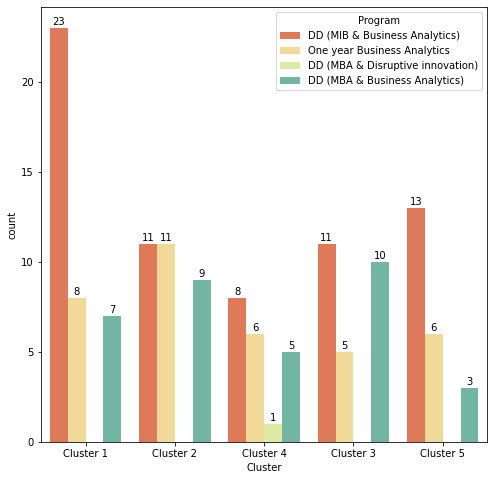

In [44]:
plt.figure(figsize=(8, 8))
hult_program = sns.countplot(x = 'Cluster',
                             hue = 'Program',
                             data = final_hult_df,
                             palette = 'Spectral')
for bar in hult_program.patches: 
    hult_program.annotate(format(bar.get_height(), 'n'),  
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha = 'center', va = 'center', 
                         size = 10, xytext = (0, 6), 
                         textcoords = 'offset points')
plt.show()

**CONCLUSION**

* Cluster 1 primarily has DD (MIB and Business Analytics) students.
* Characteristics of MIB and Business Analytics student should demonstrate:
 * Leadership and Teamwork skills
 * Analytical skills

# Big Five Insights

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
count = 0

for characteristic in big_five_pca_col:
    count += 1
    plt.subplot(4, 2, count)
    sns.boxplot(x = 'Current Laptop',
                y = characteristic,
                hue = 'Cluster',
                data = final_big_five_df,
                palette = 'Spectral')
    plt.axhline(y = 0, color = 'red')

    count += 1
    plt.subplot(4, 2, count)
    sns.boxplot(x = 'Want Laptop',
                y = characteristic,
                hue = 'Cluster',
                data = final_big_five_df,
                palette = 'Spectral')
    plt.axhline(y = 0, color = 'red')

**CONCLUSION**

Similar to Hult DNA, there is not as much a difference in behavior from the laptop they currently have and the laptop they want. This could be a small number and so we need to look at which cluster contains the most amount of Macs. There is a small outlier in which students prefer a chromebook over an Apple or a Windows product. We will consider these outliers for our dataset as it represents only 2% of the population.

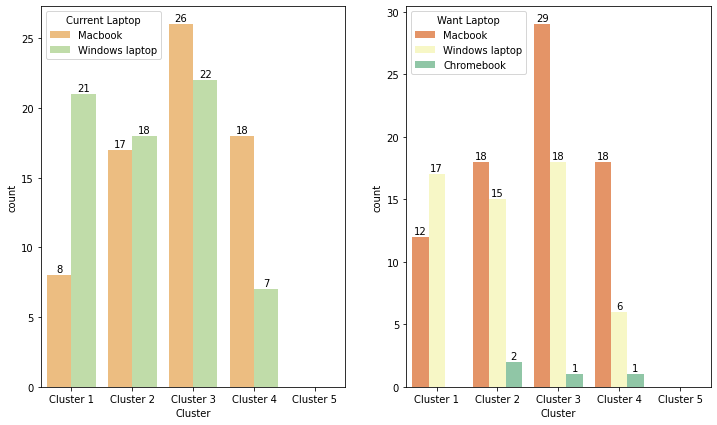

In [48]:
fig, ax = plt.subplots(figsize=(12,7))

# plot current laptop count based off clusters
plt.subplot(1, 2, 1)
current_laptop = sns.countplot(x = 'Cluster',
                               hue = 'Current Laptop',
                               data = final_big_five_df,
                               order = ["Cluster 1", "Cluster 2", "Cluster 3", 
                                        "Cluster 4", "Cluster 5"],
                               palette = 'Spectral')
# display count on top of bar
for bar in current_laptop.patches: 
    current_laptop.annotate(format(bar.get_height(), 'n'),  
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha = 'center', va = 'center', 
                         size = 10, xytext = (0, 6), 
                         textcoords = 'offset points')

plt.subplot(1, 2, 2)
# plot laptop they want count based off clusters
want_laptop = sns.countplot(x = 'Cluster',
                            hue = 'Want Laptop',
                            order = ["Cluster 1", "Cluster 2", "Cluster 3", 
                                     "Cluster 4", "Cluster 5"],
                            data = final_big_five_df,
                            palette = 'Spectral')
# display count on top of bar
for bar in want_laptop.patches: 
    want_laptop.annotate(format(bar.get_height(), 'n'),  
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha = 'center', va = 'center', 
                         size = 10, xytext = (0, 6), 
                         textcoords = 'offset points')

**CONCLUSION**

* Cluster 1 and 3 bring more opportunity for Windows users to switch to use Apple products.

# General Insights

* From the data, 68 people have a Windows laptop and 69 have a Macbook, from the Windows owners 14 would acquire a Macbook in the future, representing 20%.
* But people who were already the Macbook only 6 would not acquire it again, representing 8%.

---

Based on the Big 5 Personality Test, participants showed these personalities:
* **Cautiously Opinionated**
 * Challenging/Detached, Easy-Going/Careless
* **Friendly**
 * Outgoing/Energetic, Sensitive/Nervous
* **Curious Introvert**
 * Curious/Inventive, Solidarity/Reserved

---
 
Based on the Hult DNA Test, participants showed these personalities
* **Opinionated**
 * Fixed Mindset
 * Their Opinion Matters
 * Works Alone

* **Team Leader**
 * Fixed Mindset
 * Team Player, Average Communicator

* **Debater** 
 * Communicates ideas
 * Not a team player

---

There are three potential markets here:
1. People who already own a Macbook are likely to get a Macbook due to feasibility of integrating all Apple products with Apple's ecosystem.
2. People that are more curious and open to trying something new are more likely to buy a Macbook. Those are are more curious, then to be critical thinkers and like potential market 1, see that there is an better quality of life when introduced to the Apple Ecosystem.
3. People that are more friendly and social are more likely to buy a Macbook. Another aspect that is not considered in market 1 and 2 is security. Based off of company history, Apple is known to care for its customer's privacy over Microsoft's products.

---

Apple should create marketing campaigns that emphasize the feasibility of joining the Apple ecosystem. By doing so, you are advertising to the headstrong Apple believers and convincing the critical thinkers and convert them to the headstrong Apple believers.

You are also advertising to the friendly, social population as they will see the feasibility of talking to others via all the Apple products (iPhone, Mac, etc.). They will see that not only is it easy to reach out to others, but also feel secure with their privacy information.

This represents around **56%** of the survey participants when answering the questions from the Personality Test.


# Bibliography

Big Five: Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42

Kaspersky. (2020, August 26). Mac vs PC Security: How You Can Stay Safe. Retrieved from https://usa.kaspersky.com/resource-center/threats/mac-vs-pc-security

Hult DNA Skills Framework Development Guide 2020 - 2021